# NBA Analytics - The NBA's Most Dominant Offensive Players

## 1. Idea Exploration

## 2. Initial Data Exploration/Cleaning

## 3. Offensive Player Stat Comparison

## 4. Player Ranking Methods

## 5. Future Analysis and Conclusion

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#File to load
file = "Seasons_stats2.csv"

#Reading file and storing to dataframe
nba_data = pd.read_csv(file)

nba_data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


# 2. Initial Data Exploration/Cleaning - Blaine

In [66]:
# Adding new calculated columns to data frame
# Minutes per game
nba_data['MPG'] = nba_data['MP'] / nba_data['G']
#nba_data['MPG'] = nba_data['MPG'].map('{:.1f}'.format)

# Points per game
nba_data['PPG'] = nba_data['PTS'] / nba_data['G']
#nba_data['PPG'] = nba_data['PPG'].map('{:.1f}'.format)

# Offensive rebounds per game
nba_data['ORBG'] = nba_data['ORB'] / nba_data['G']
#nba_data['ORBG'] = nba_data['ORBG'].map('{:.1f}'.format)

# Assists per game
nba_data['APG'] = nba_data['AST'] / nba_data['G']
#nba_data['APG'] = nba_data['APG'].map('{:.1f}'.format)


# Field Goal attempts per game
nba_data['FGAG'] = nba_data['FGA'] / nba_data['G']
#nba_data['FGAG'] = nba_data['FGAG'].map('{:.1f}'.format)

# 3pointer made per game
nba_data['3PG'] = nba_data['3P'] / nba_data['G']
#nba_data['3PG'] = nba_data['3PG'].map('{:.1f}'.format)

nba_data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,BLK,TOV,PF,PTS,MPG,PPG,ORBG,APG,FGAG,3PG
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,217.0,458.0,NaN,7.269841,NaN,2.793651,8.190476,NaN
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,99.0,279.0,NaN,5.693878,NaN,2.224490,5.591837,NaN
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,192.0,438.0,NaN,6.537313,NaN,2.089552,7.447761,NaN
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,29.0,63.0,NaN,4.200000,NaN,1.333333,5.733333,NaN
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,27.0,59.0,NaN,4.538462,NaN,1.538462,6.307692,NaN


In [67]:
#Figuring out how many 'games played' we want to filter out
#Describe 'Games played column' gives us a starting point
nba_data['G'].describe()

count    24624.000000
mean        50.837110
std         26.496161
min          1.000000
25%         27.000000
50%         58.000000
75%         75.000000
max         88.000000
Name: G, dtype: float64

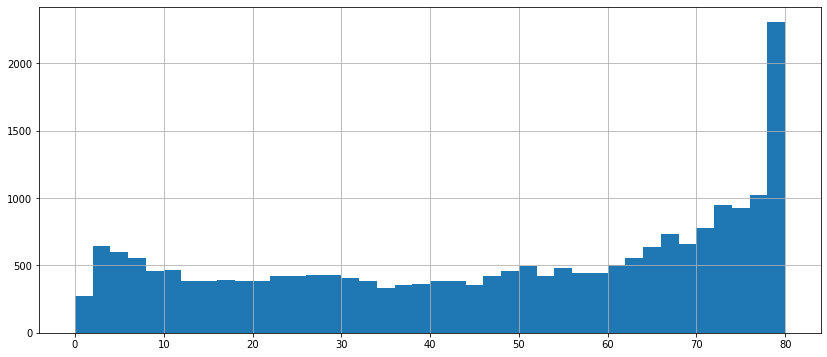

In [68]:
#Plotting histogram to gives us a visual of games played
bin_values = np.arange(start=0, stop = 82, step = 2)
nba_data['G'].hist(bins=bin_values, figsize=[14,6])
plt.show()

In [69]:
#Figuring out how many 'minutes played per game' we want to filter out
#Describe 'Games played column' gives us a starting point
nba_data['MPG'].describe()

count    24138.000000
mean        20.326823
std         10.378571
min          0.000000
25%         11.625000
50%         19.520396
75%         28.941346
max         48.525000
Name: MPG, dtype: float64

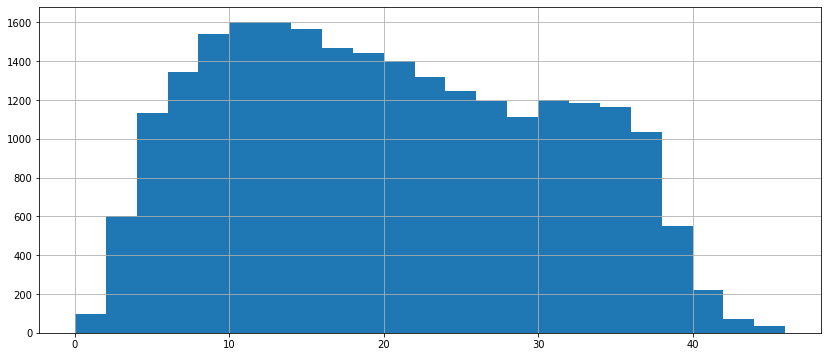

In [70]:
#Plotting histogram to gives us a visual of minutes per game
bin_values = np.arange(start=0, stop = 48, step = 2)
nba_data['MPG'].hist(bins=bin_values, figsize=[14,6])
plt.show()

In [71]:
#Filtering data to seasons after 1980, MPG(minutes per game) played, and G(total games played in the season) 
min_year = 1980
min_per_game = 10
min_gm_played = 10
player_data = nba_data[(nba_data['Year'] >= min_year) & (nba_data['MPG'] >= min_per_game) & (nba_data['G'] >= min_gm_played)]
player_data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,BLK,TOV,PF,PTS,MPG,PPG,ORBG,APG,FGAG,3PG
5727,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,...,280.0,297.0,216.0,2034.0,38.329268,24.804878,2.317073,4.524390,16.865854,0.00
5728,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,...,12.0,39.0,118.0,362.0,18.238806,5.402985,0.925373,1.298507,4.746269,0.00
5729,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,...,55.0,218.0,237.0,1118.0,28.906667,14.906667,2.106667,4.293333,11.666667,0.00
5730,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,10.0,242.0,218.0,1131.0,35.800000,14.137500,0.737500,8.387500,9.925000,0.05
5731,5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,...,15.0,27.0,66.0,86.0,21.538462,3.307692,1.115385,1.538462,2.307692,0.00


# 3. Offensive Player Stat Comparison - Walter

## 3a. Offensive Stat 1 - Player Scoring

In [72]:
#Creating a series from the CSV with Year, Player, PTS, and our new column Minutes/Game
player_points = player_data[['Year','Player', 'PTS', 'FG%','TS%','PPG', 'G', 'MPG']]

#Sorting and displaying to check if the Minutes/Game column is calculating correctly
player_points = player_points.sort_values(by='PPG', ascending=False)
top_player_points = player_points.head(10)
top_player_points

,Year,Player,PTS,FG%,TS%,PPG,G,MPG
8469,1987.0,Michael Jordan*,3041.0,0.482,0.562,37.085366,82.0,40.012195
17742,2006.0,Kobe Bryant,2832.0,0.450,0.559,35.400000,80.0,40.962500
8869,1988.0,Michael Jordan*,2868.0,0.535,0.603,34.975610,82.0,40.378049
9747,1990.0,Michael Jordan*,2753.0,0.526,0.606,33.573171,82.0,38.987805
5848,1980.0,George Gervin*,2585.0,0.528,0.587,33.141026,78.0,37.615385
17904,2006.0,Allen Iverson*,2377.0,0.447,0.543,33.013889,72.0,43.097222
7722,1985.0,Bernard King*,1809.0,0.530,0.585,32.890909,55.0,37.509091
11106,1993.0,Michael Jordan*,2541.0,0.495,0.564,32.576923,78.0,39.320513
9297,1989.0,Michael Jordan*,2633.0,0.538,0.614,32.506173,81.0,40.185185
6557,1982.0,George Gervin*,2551.0,0.500,0.562,32.291139,79.0,35.658228


Text(-20, 20, 'Michael Jordan')

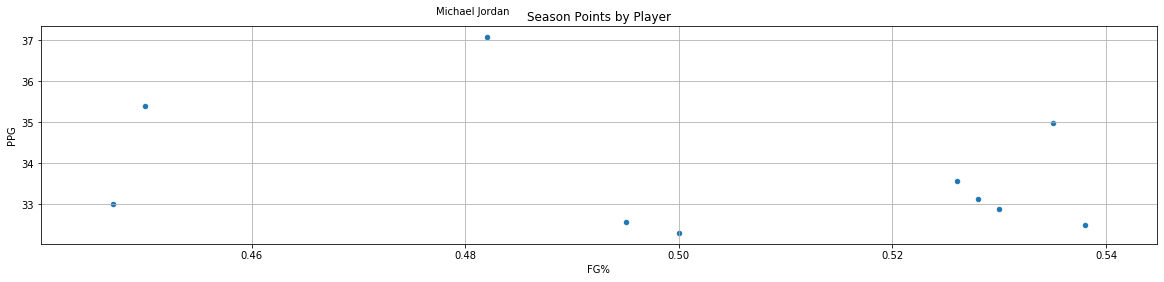

In [73]:
top_player_points.plot(kind="scatter", x="FG%", y="PPG", grid=True, figsize=(20,4),
                 title="Season Points by Player")
plt.annotate('Michael Jordan', xy=(0.486, 37.085366), xytext=(-20, 20), textcoords= 'offset points', ha='right', 
             va='bottom')

#player_points.plt.scatter(x_axis, data, marker=“o”, facecolors=“red”, edgecolors=“black”, s=x_axis, alpha=0.75)

In [74]:
nba_year_input = input("Enter a year ")
nba_year_data = player_data[player_data['Year'] == int(nba_year_input)]
pts_mean = nba_year_data['PTS'].mean()
pts_median = nba_year_data['PTS'].median()
print(f"average scoring in {nba_year_input} was {pts_mean}")
print(f"median scoring in {nba_year_input} was {pts_median}")

Enter a year 1987
average scoring in 1987 was 733.3797909407665
median scoring in 1987 was 608.0


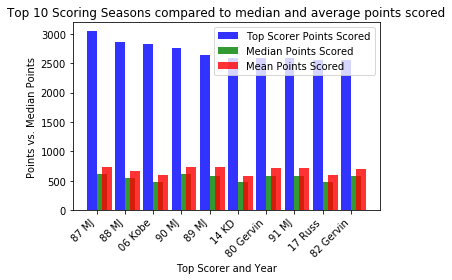

In [75]:
n_groups = 10
top_points_list = (3041, 2868, 2832, 2753, 2633, 2593, 2585, 2580, 2558, 2551)
median_points_list = (608, 552, 479, 621.5, 574.5, 481.5, 588, 581, 483.5, 578)
mean_points_list = (733.4, 659, 606, 727.5, 734.4, 585.6, 711.5, 718.4, 600.5, 695.8)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = .35
opacity = 0.8

rects1 = plt.bar(index, top_points_list, bar_width, align = 'edge',
alpha=opacity,
color='b',
label='Top Scorer Points Scored')

rects2 = plt.bar(index + bar_width, median_points_list, bar_width, align = 'edge',
alpha=opacity,
color='g',
label='Median Points Scored')

rects3 = plt.bar(index + bar_width + bar_width, mean_points_list, bar_width, align = 'center',
alpha=opacity,
color='r',
label='Mean Points Scored')

plt.xlabel('Top Scorer and Year')
plt.ylabel('Points vs. Median Points')
plt.title('Top 10 Scoring Seasons compared to median and average points scored')

plt.xticks(index + bar_width, ('87 MJ', '88 MJ', '06 Kobe', '90 MJ', '89 MJ', '14 KD', '80 Gervin', '91 MJ', 
                                   '17 Russ', '82 Gervin'))

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

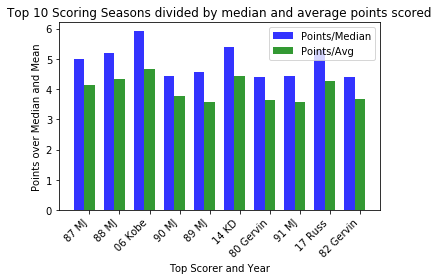

In [76]:
n_groups = 10
points_overmedian = (3041/608, 2868/552, 2832/479, 2753/621.5, 2633/574.5, 2593/481.5, 2585/588, 2580/581, 
                   2558/483.5, 2551/578)
points_overavg = (3041/733.4, 2868/659, 2832/606, 2753/727.5, 2633/734.4, 2593/585.6, 2585/711.5, 2580/718.4, 
                    2558/600.5, 2551/695.8)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = .35
opacity = 0.8

rect1 = plt.bar(index, points_overmedian, bar_width, align = 'center',
alpha=opacity,
color='b',
label='Points/Median')

rect2 = plt.bar(index + bar_width, points_overavg, bar_width, align = 'center',
alpha=opacity,
color='g',
label='Points/Avg')

plt.xlabel('Top Scorer and Year')
plt.ylabel('Points over Median and Mean')
plt.title('Top 10 Scoring Seasons divided by median and average points scored')

plt.xticks(index + bar_width, ('87 MJ', '88 MJ', '06 Kobe', '90 MJ', '89 MJ', '14 KD', '80 Gervin', '91 MJ', 
                                   '17 Russ', '82 Gervin'))

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 3b. Offensive Stat 2 - True Shooting Percentage

In [77]:
# Filting player shooting to players who took more than 10 shots per game
attempts_filter = player_data['FGAG'] >= 10
player_shooting_attempts = player_data[attempts_filter]
player_shooting_attempts = player_shooting_attempts[['Year','Player','TS%', 'FG%', 'FGA', 'G', 'FGAG', 'PPG']]

# #Converting the PTS column to a numberica dtype
# player_TS['TS%'] = pd.to_numeric(player_TS['TS%'])

# #Sorting and displaying top shooters by TS%
player_shooting_attempts = player_shooting_attempts.sort_values(by='TS%', ascending=False)
top_player_shooting = player_shooting_attempts.head(10)
top_player_shooting

,Year,Player,TS%,FG%,FGA,G,FGAG,PPG
6558,1982.0,Artis Gilmore*,0.702,0.652,837.0,82.0,10.207317,18.500000
7660,1985.0,Artis Gilmore*,0.680,0.623,854.0,81.0,10.543210,19.111111
23633,2016.0,Stephen Curry,0.669,0.504,1598.0,79.0,20.227848,30.063291
6938,1983.0,Artis Gilmore*,0.668,0.626,888.0,82.0,10.829268,18.036585
8699,1988.0,Charles Barkley*,0.665,0.587,1283.0,80.0,16.037500,28.300000
6895,1983.0,Adrian Dantley*,0.661,0.580,402.0,22.0,18.272727,30.727273
9564,1990.0,Charles Barkley*,0.661,0.600,1177.0,79.0,14.898734,25.177215
21338,2012.0,James Harden,0.660,0.491,629.0,62.0,10.145161,16.838710
8316,1987.0,Charles Barkley*,0.660,0.594,937.0,68.0,13.779412,23.000000
8910,1988.0,Kevin McHale*,0.656,0.604,911.0,64.0,14.234375,22.593750


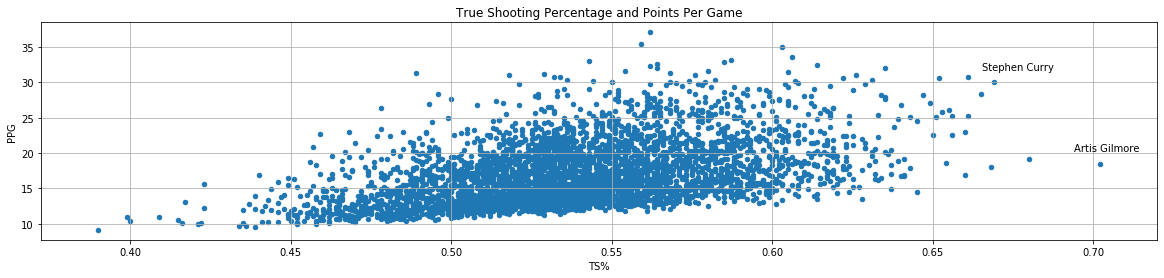

In [78]:
TS_Points = player_shooting_attempts[['PPG', 'TS%']]

TS_Points.plot(kind="scatter", x="TS%", y="PPG", grid=True, figsize=(20,4),
                 title="True Shooting Percentage and Points Per Game")
plt.annotate('Artis Gilmore', xy=(0.702, 18.5), xytext=(40, 10), textcoords= 'offset points', ha='right', 
             va='bottom')
plt.annotate('Stephen Curry', xy=(0.669, 30.1), xytext=(60, 10), textcoords= 'offset points', ha='right', 
             va='bottom')
plt.show()

## 3c. Offensive Stat 3 - Effective Field Goal Percentage (eFG%) - Peter

In [79]:
#Creating a dataframe from the CSV with new effective field goal percentage with more than attempts per game
player_efg = player_data[attempts_filter]
player_efg = player_efg[['Year','Player', 'eFG%', 'G', 'PPG', 'FGA', 'FGAG']]

#Sorting players for eFG%
player_efg = player_efg.sort_values(by='eFG%', ascending=False)

player_efg.head(10)


,Year,Player,eFG%,G,PPG,FGA,FGAG
6558,1982.0,Artis Gilmore*,0.653,82.0,18.500000,837.0,10.207317
23633,2016.0,Stephen Curry,0.630,79.0,30.063291,1598.0,20.227848
6938,1983.0,Artis Gilmore*,0.626,82.0,18.036585,888.0,10.829268
7660,1985.0,Artis Gilmore*,0.623,81.0,19.111111,854.0,10.543210
18562,2007.0,Steve Nash,0.613,76.0,18.578947,971.0,12.776316
20167,2010.0,Dwight Howard,0.612,82.0,18.329268,834.0,10.170732
22548,2014.0,LeBron James,0.610,77.0,27.129870,1353.0,17.571429
19741,2009.0,Shaquille O'Neal*,0.609,75.0,17.773333,841.0,11.213333
24538,2017.0,Otto Porter,0.608,80.0,13.437500,803.0,10.037500
9564,1990.0,Charles Barkley*,0.608,79.0,25.177215,1177.0,14.898734


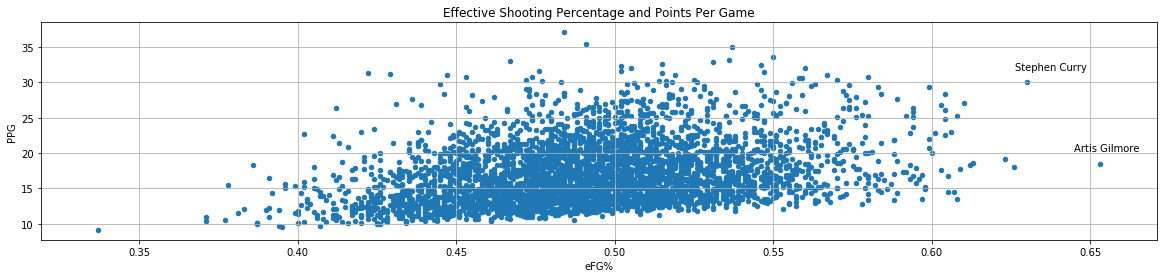

In [80]:
ES_Points = player_efg

ES_Points.plot(kind="scatter", x="eFG%", y="PPG", grid=True, figsize=(20,4),
                 title="Effective Shooting Percentage and Points Per Game")
plt.annotate('Artis Gilmore', xy=(0.653, 18.5), xytext=(40, 10), textcoords= 'offset points', ha='right', 
             va='bottom')
plt.annotate('Stephen Curry', xy=(0.630, 30.1), xytext=(60, 10), textcoords= 'offset points', ha='right', 
             va='bottom')
plt.show()

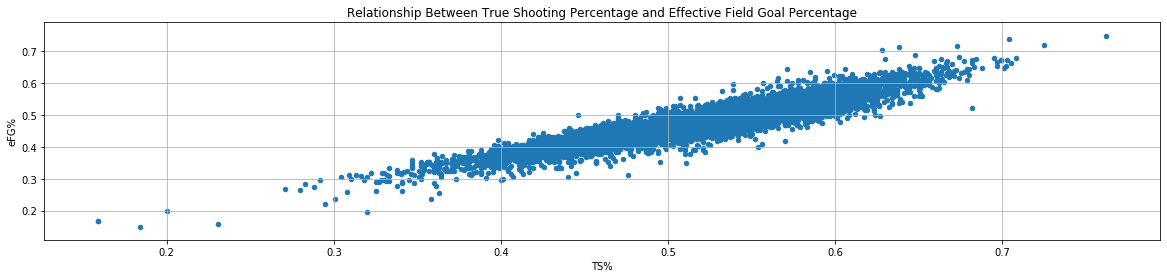

In [81]:
#Exploring data and comparing TS% vs eFG%
ts_vs_eFG = player_data[['Year','Player', '3PG', '3P', '3PA', '3P%', 'PPG','G', 'TS%', 'eFG%']]
shooting_stats_relationship = player_data[['TS%', 'eFG%']]

ts_vs_eFG.plot(kind="scatter", x="TS%", y="eFG%", grid=True, figsize=(20,4),
                 title="Relationship Between True Shooting Percentage and Effective Field Goal Percentage")
plt.show()

## 3d. Offensive Stat 4 - Assists per Game

In [82]:
# Creating assists dataframe
player_apg = player_data[['Year','Player', 'APG', 'AST', 'G']]
player_apg = player_apg.sort_values(by='APG', ascending=False)
player_apg.head(10)






,Year,Player,APG,AST,G
9923,1990.0,John Stockton*,14.538462,1134.0,78.0
10377,1991.0,John Stockton*,14.195122,1164.0,82.0
7857,1985.0,Isiah Thomas*,13.864198,1123.0,81.0
9018,1988.0,John Stockton*,13.756098,1128.0,82.0
10844,1992.0,John Stockton*,13.731707,1126.0,82.0
9461,1989.0,John Stockton*,13.634146,1118.0,82.0
7348,1984.0,Magic Johnson*,13.059701,875.0,67.0
9283,1989.0,Magic Johnson*,12.831169,988.0,77.0
21098,2011.0,Deron Williams,12.750000,153.0,12.0
8082,1986.0,Magic Johnson*,12.597222,907.0,72.0


## 3e. Offensive Stat 5 - Offensive Rebound Per Game Played

In [83]:
#Creating offensive rebound dataframe
player_orbg = player_data[['Year','Player', 'ORBG', 'ORB', 'G']]
player_orbg = player_orbg.sort_values(by='ORBG', ascending=False)
player_orbg.head(10)

,Year,Player,ORBG,ORB,G
5942,1980.0,Moses Malone*,6.987805,573.0,82.0
6672,1982.0,Moses Malone*,6.888889,558.0,81.0
13941,1998.0,Jayson Williams,6.815385,443.0,65.0
10801,1992.0,Dennis Rodman*,6.378049,523.0,82.0
6298,1981.0,Moses Malone*,5.925000,474.0,80.0
11248,1993.0,Dennis Rodman*,5.919355,367.0,62.0
13392,1997.0,Jayson Williams,5.902439,242.0,41.0
13278,1997.0,Dennis Rodman*,5.818182,320.0,55.0
8316,1987.0,Charles Barkley*,5.735294,390.0,68.0
11737,1994.0,Dennis Rodman*,5.734177,453.0,79.0


## 3f. Offensive Stat 6 - Three Pointers Made Per Game Played -Bryan

In [84]:
player_3pg = player_data[['Year','Player', '3PG', '3P', '3PA', '3P%', 'PPG','G', 'TS%']]
player_3pg = player_3pg.sort_values(by='3PG', ascending=False)
player_3pg.head(10)

,Year,Player,3PG,3P,3PA,3P%,PPG,G,TS%
23633,2016.0,Stephen Curry,5.088608,402.0,886.0,0.454,30.063291,79.0,0.669
24216,2017.0,Stephen Curry,4.101266,324.0,789.0,0.411,25.303797,79.0,0.624
23000,2015.0,Stephen Curry,3.575000,286.0,646.0,0.443,23.750000,80.0,0.638
21798,2013.0,Stephen Curry,3.487179,272.0,600.0,0.453,22.897436,78.0,0.589
24033,2016.0,Klay Thompson,3.450000,276.0,650.0,0.425,22.137500,80.0,0.597
17665,2006.0,Ray Allen,3.448718,269.0,653.0,0.412,25.064103,78.0,0.590
24617,2017.0,Klay Thompson,3.435897,268.0,647.0,0.414,22.333333,78.0,0.592
22402,2014.0,Stephen Curry,3.346154,261.0,615.0,0.424,24.012821,78.0,0.610
15512,2002.0,Ray Allen,3.318841,229.0,528.0,0.434,21.782609,69.0,0.598
24290,2017.0,Eric Gordon,3.280000,246.0,661.0,0.372,16.226667,75.0,0.557


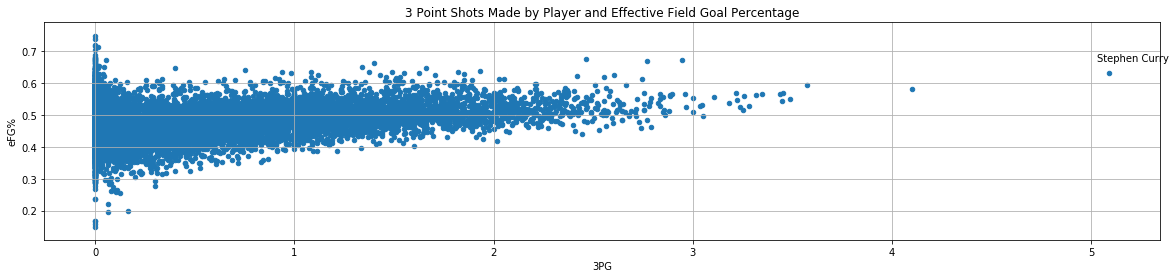

In [85]:
player_3_eFG = player_data[['Year','Player', '3PG', '3P', '3PA', '3P%', 'PPG','G', 'TS%', 'eFG%']]

player_3_eFG.plot(kind="scatter", x="3PG", y="eFG%", grid=True, figsize=(20,4),
                 title="3 Point Shots Made by Player and Effective Field Goal Percentage")
plt.annotate('Stephen Curry', xy=(5.09, 0.630), xytext=(60, 10), textcoords= 'offset points', ha='right', 
             va='bottom')
plt.show()

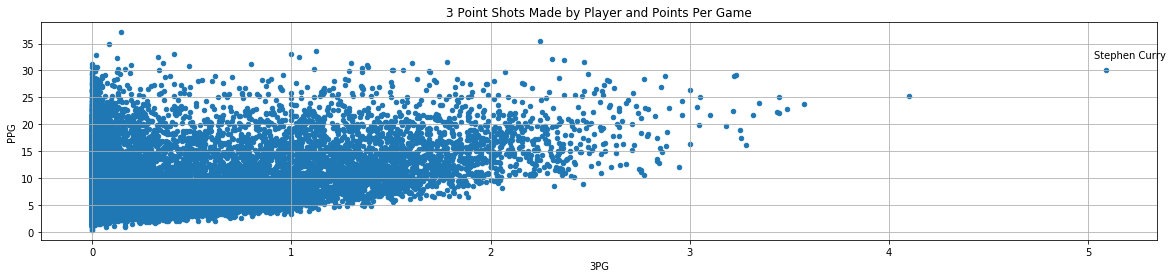

In [86]:
player_3pg.plot(kind="scatter", x="3PG", y="PPG", grid=True, figsize=(20,4),
                 title="3 Point Shots Made by Player and Points Per Game")
plt.annotate('Stephen Curry', xy=(5.09, 30.1), xytext=(60, 10), textcoords= 'offset points', ha='right', 
             va='bottom')
plt.show()

# 4. Player Ranking Methods

## Considering Player Dominance Against Median Performance

In [87]:
grouped_by_year = player_data.groupby(['Year'])
ppg_year_median = grouped_by_year['PPG'].median()
TS_year_median = grouped_by_year['TS%'].median()
EFG_year_median = grouped_by_year['eFG%'].median()
APG_year_median = grouped_by_year['APG'].median()
ORBG_year_median = grouped_by_year['ORBG'].median()
Three_year_median = grouped_by_year['3PG'].median()

median_df = pd.DataFrame({'Points Per Game median': ppg_year_median,
                          'True Shooting median': TS_year_median,
                          'Effective Field Goal median': EFG_year_median,
                          'Assists Per Game median': APG_year_median,
                          'Offensive Rebounds Per Game median': ORBG_year_median,
                          '3 Pointers Made Per Game median': Three_year_median
                         })

median_df.head(37)

,Points Per Game median,True Shooting median,Effective Field Goal median,Assists Per Game median,Offensive Rebounds Per Game median,3 Pointers Made Per Game median
Year,,,,,,
1980.0,9.627178,0.5240,0.4790,2.134078,1.293777,0.013158
1981.0,9.363636,0.5200,0.4790,2.208333,1.263158,0.000000
1982.0,9.509654,0.5270,0.4850,1.765915,1.227791,0.012195
1983.0,8.792208,0.5190,0.4770,1.914634,1.260274,0.000000
1984.0,9.012195,0.5285,0.4815,2.120491,1.169048,0.013794
1985.0,9.254393,0.5345,0.4890,1.913872,1.196046,0.012500
1986.0,9.000000,0.5250,0.4810,1.909091,1.115385,0.022222
1987.0,9.176471,0.5220,0.4760,1.841463,1.175439,0.015385
1988.0,8.848279,0.5290,0.4800,1.750000,1.147385,0.031054


In [88]:
ppg_total_median = player_data['PPG'].median()
TS_total_median = player_data['TS%'].median()
EFG_total_median = player_data['eFG%'].median()
APG_total_median = player_data['APG'].median()
ORBG_total_median = player_data['ORBG'].median()
ThreePG_total_median = player_data['3PG'].median()

allyears_df = pd.DataFrame({'All Years Points Per Game median': [ppg_total_median],
                          'All Years True Shooting median': [TS_total_median],
                          'All Years Effective Field Goal median': [EFG_total_median],
                          'All Years Assists Per Game median': [APG_total_median],
                          'All Years Offensive Rebounds Per Game median': [ORBG_total_median],
                          'All Years 3 Pointers Made Per Game median': [ThreePG_total_median]
                          })

allyears_df.head(38)

,All Years Points Per Game median,All Years True Shooting median,All Years Effective Field Goal median,All Years Assists Per Game median,All Years Offensive Rebounds Per Game median,All Years 3 Pointers Made Per Game median
0,8.441558,0.525,0.482,1.66,0.986754,0.141026


In [89]:
player_name = player_data['Player']
player_season = player_data['Year']
player_ppg = player_data['PPG']
player_efg = player_data['eFG%']
player_apg = player_data['APG']
player_orbg = player_data['ORBG']
player_3pg = player_data['3PG']

player_ppg_weight = ((player_data['PPG'] - 8.441558)/8.441558)
player_efg_weight = ((player_data['eFG%'] - 0.482)/0.482)
player_assist_weight = ((player_data['APG'] - 1.66)/1.66)
player_opg_weight = ((player_data['ORBG'] - 0.986754)/0.986754)
player_3pg_weight = ((player_data['3PG'] - 0.141026)/0.141026)

player_total_weight = (player_ppg_weight + player_efg_weight + player_assist_weight + 
                       player_opg_weight + player_3pg_weight)


weight_df = pd.DataFrame({'Player Name': player_name,
                          'Season': player_season,
                          'Weight': player_total_weight,
                          'Points Per Game': player_ppg,
                          'Effective Field Goal Percentage': player_efg,
                          'Assists Per Game': player_apg,
                          'Offensive Rebounds Per Game': player_orbg,
                          'Made 3 Pointers Per Game': player_3pg
                          })
  

weight_df = weight_df.sort_values(by='Weight', ascending=False)
weight_list = weight_df.head(10)
weight_list


,Player Name,Season,Weight,Points Per Game,Effective Field Goal Percentage,Assists Per Game,Offensive Rebounds Per Game,Made 3 Pointers Per Game
23633,Stephen Curry,2016.0,40.842080,30.063291,0.630,6.670886,0.860759,5.088608
24216,Stephen Curry,2017.0,33.053097,25.303797,0.580,6.620253,0.772152,4.101266
24306,James Harden,2017.0,30.397449,29.086420,0.525,11.185185,1.172840,3.234568
23000,Stephen Curry,2015.0,29.766304,23.750000,0.594,7.737500,0.700000,3.575000
21798,Stephen Curry,2013.0,28.508049,22.897436,0.549,6.910256,0.756410,3.487179
22402,Stephen Curry,2014.0,28.487394,24.012821,0.566,8.538462,0.589744,3.346154
17665,Ray Allen,2006.0,26.683557,25.064103,0.544,3.666667,0.910256,3.448718
24429,Kyle Lowry,2017.0,26.640555,22.400000,0.569,6.950000,0.800000,3.216667
24612,Isaiah Thomas,2017.0,26.551522,28.934211,0.546,5.907895,0.565789,3.223684
15512,Ray Allen,2002.0,25.833496,21.782609,0.561,3.927536,1.173913,3.318841


In [90]:
player_name = player_data['Player']
player_season = player_data['Year']
player_ppg = player_data['PPG']
player_efg = player_data['eFG%']
player_apg = player_data['APG']
player_orbg = player_data['ORBG']


player_ppg_weight = ((player_data['PPG'] - 8.441558)/8.441558)
player_efg_weight = ((player_data['eFG%'] - 0.482)/0.482)
player_assist_weight = ((player_data['APG'] - 1.66)/1.66)
player_opg_weight = ((player_data['ORBG'] - 0.986754)/0.986754)


player_total_weight = (player_ppg_weight + player_efg_weight + player_assist_weight + 
                       player_opg_weight)


weight_df = pd.DataFrame({'Player Name': player_name,
                          'Season': player_season,
                          'Weight': player_total_weight,
                          'Points Per Game': player_ppg,
                          'Effective Field Goal Percentage': player_efg,
                          'Assists Per Game': player_apg,
                          'Offensive Rebounds Per Game': player_orbg,
                          })
  

weight_df = weight_df.sort_values(by='Weight', ascending=False)
weight_list = weight_df.head(10)
weight_list


,Player Name,Season,Weight,Points Per Game,Effective Field Goal Percentage,Assists Per Game,Offensive Rebounds Per Game
7857,Isiah Thomas*,1985.0,9.264660,21.234568,0.468,13.864198,1.407407
9283,Magic Johnson*,1989.0,8.962027,22.467532,0.535,12.831169,1.441558
8459,Magic Johnson*,1987.0,8.818399,23.862500,0.525,12.212500,1.525000
6672,Moses Malone*,1982.0,8.799674,31.111111,0.519,1.753086,6.888889
8316,Charles Barkley*,1987.0,8.726478,23.000000,0.606,4.867647,5.735294
24654,Russell Westbrook,2017.0,8.689870,31.580247,0.476,10.370370,1.691358
9923,John Stockton*,1990.0,8.661723,17.243590,0.540,14.538462,0.730769
7348,Magic Johnson*,1984.0,8.628037,17.582090,0.569,13.059701,1.477612
24306,James Harden,2017.0,8.461481,29.086420,0.525,11.185185,1.172840
9461,John Stockton*,1989.0,8.396493,17.073171,0.547,13.634146,1.012195


In [91]:
player_name = player_data['Player']
player_season = player_data['Year']
player_ppg = player_data['PPG']
player_efg = player_data['eFG%']
player_orbg = player_data['ORBG']


player_ppg_weight = ((player_data['PPG'] - 8.441558)/8.441558)
player_efg_weight = ((player_data['eFG%'] - 0.482)/0.482)
player_opg_weight = ((player_data['ORBG'] - 0.986754)/0.986754)


player_total_weight = (player_ppg_weight + player_efg_weight + 
                       player_opg_weight)


weight_df = pd.DataFrame({'Player Name': player_name,
                          'Season': player_season,
                          'Weight': player_total_weight,
                          'Points Per Game': player_ppg,
                          'Effective Field Goal Percentage': player_efg,
                          'Offensive Rebounds Per Game': player_orbg,
                          })
  

weight_df = weight_df.sort_values(by='Weight', ascending=False)
weight_list = weight_df.head(10)
weight_list


,Player Name,Season,Weight,Points Per Game,Effective Field Goal Percentage,Offensive Rebounds Per Game
6672,Moses Malone*,1982.0,8.743598,31.111111,0.519,6.888889
5942,Moses Malone*,1980.0,8.184321,25.841463,0.502,6.987805
6298,Moses Malone*,1981.0,7.377793,27.775000,0.522,5.925000
8316,Charles Barkley*,1987.0,6.794161,23.000000,0.606,5.735294
7045,Moses Malone*,1983.0,6.718883,24.461538,0.501,5.705128
11685,Shaquille O'Neal*,1994.0,6.523453,29.345679,0.599,4.740741
8699,Charles Barkley*,1988.0,6.482676,28.300000,0.604,4.812500
13941,Jayson Williams,1998.0,6.465488,12.876923,0.498,6.815385
9131,Charles Barkley*,1989.0,6.456618,25.784810,0.594,5.101266
14806,Shaquille O'Neal*,2000.0,6.015989,29.670886,0.574,4.253165


In [92]:
player_name = player_data['Player']
player_season = player_data['Year']
player_ppg = player_data['PPG']
player_efg = player_data['eFG%']
player_orbg = player_data['ORBG']


player_ppg_weight = ((player_data['PPG'] - 8.441558)/8.441558)
player_efg_weight = ((player_data['eFG%'] - 0.482)/0.482)



player_total_weight = (player_ppg_weight + player_efg_weight)


weight_df = pd.DataFrame({'Player Name': player_name,
                          'Season': player_season,
                          'Weight': player_total_weight,
                          'Points Per Game': player_ppg,
                          'Effective Field Goal Percentage': player_efg,
                          })
  

weight_df = weight_df.sort_values(by='Weight', ascending=False)
weight_list = weight_df.head(10)
weight_list

,Player Name,Season,Weight,Points Per Game,Effective Field Goal Percentage
8469,Michael Jordan*,1987.0,3.397339,37.085366,0.484
8869,Michael Jordan*,1988.0,3.257373,34.975610,0.537
17742,Kobe Bryant,2006.0,3.212211,35.400000,0.491
9747,Michael Jordan*,1990.0,3.118209,33.573171,0.550
5848,George Gervin*,1980.0,3.037970,33.141026,0.536
7722,Bernard King*,1985.0,2.997968,32.890909,0.531
9297,Michael Jordan*,1989.0,2.983512,32.506173,0.546
22438,Kevin Durant,2014.0,2.954058,32.012346,0.560
11106,Michael Jordan*,1993.0,2.927577,32.576923,0.515
17904,Allen Iverson*,2006.0,2.879756,33.013889,0.467


# Conclusion

By considering individual player statistics against the median performance in the NBA over 37 seasons, 
Stephen Curry's 2015-2016 season was the most dominant offensive season.  Across the 5 statistics we chose to consider, Curry performed over 40 times greater than the median performance.  
Coincidentally, Stephen Curry won the NBA MVP award that year by unanimous vote, the only time this has happened in NBA history.  Curry's team, the Golden State Warriors, also set the NBA record for regular season wins.  Their season may have been considered the best season in NBA history.  But the Cleveland Cavaliers won the NBA title in miraculous fashion to bring the first (and only) NBA championship to Ohio. 